In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the dataset
df = pd.read_csv('Google-Playstore.csv')
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

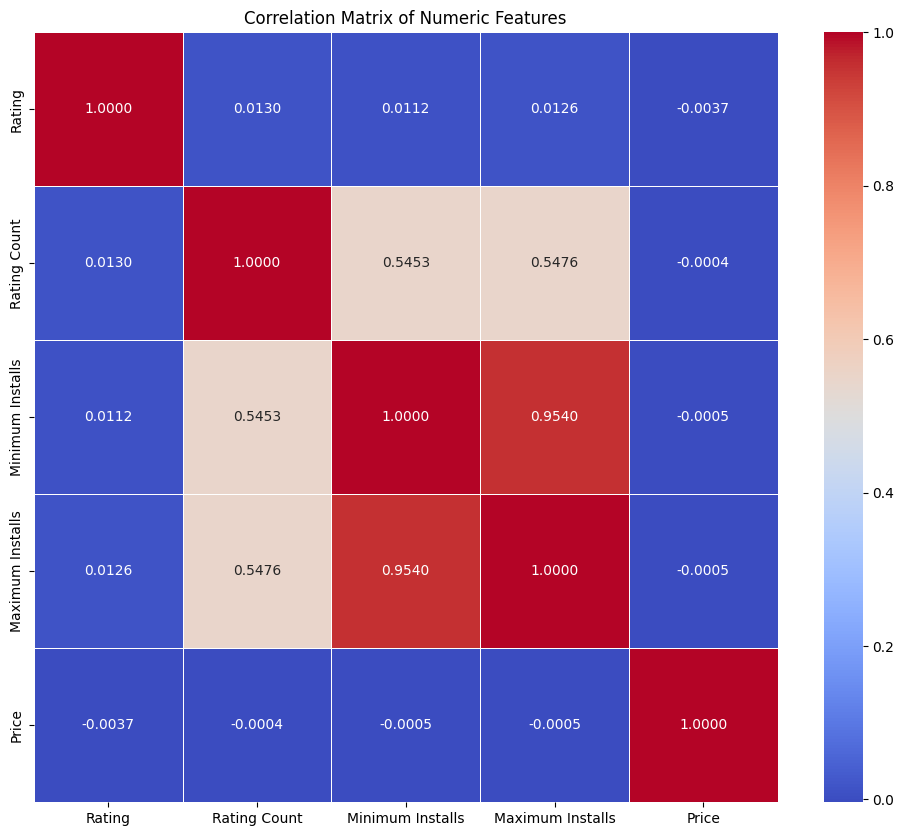

In [5]:
# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

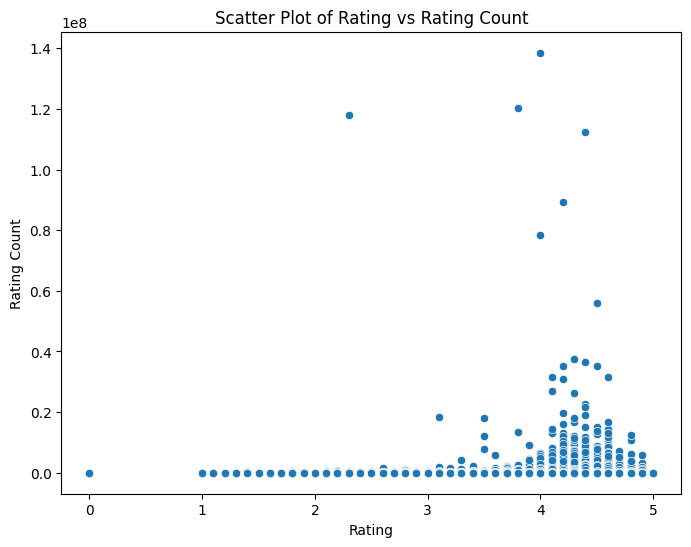

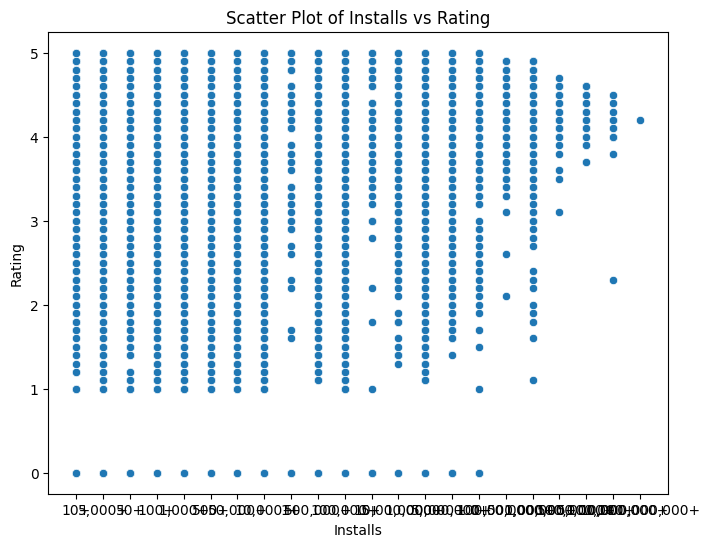

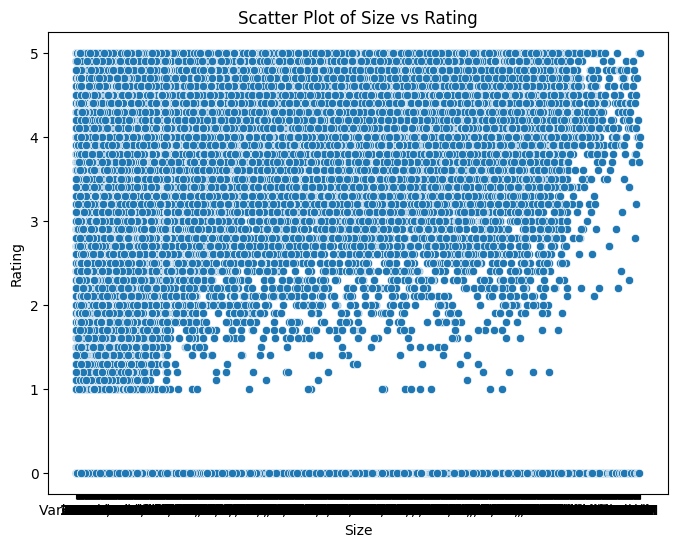

In [9]:
# Choose pairs of features for scatter plots
feature_pairs = [
    ('Rating', 'Rating Count'),
    ('Installs', 'Rating'),
    ('Size', 'Rating'),
    # Add more pairs as needed
]

# Create scatter plots
for pair in feature_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=pair[0], y=pair[1])
    plt.title(f'Scatter Plot of {pair[0]} vs {pair[1]}')
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.show()


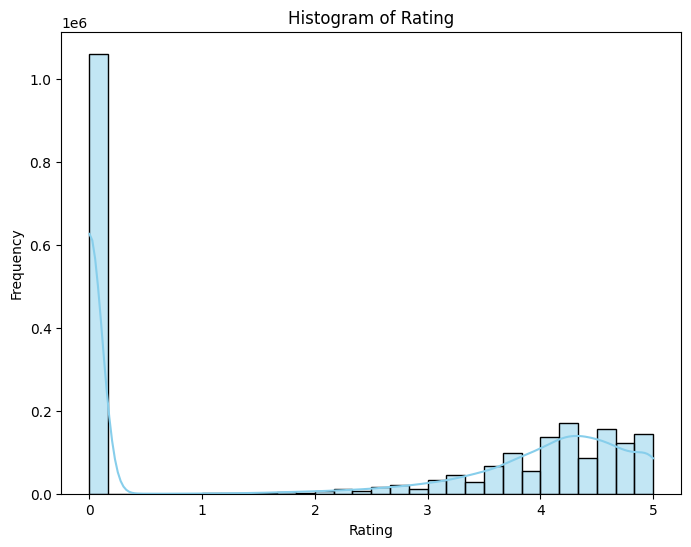

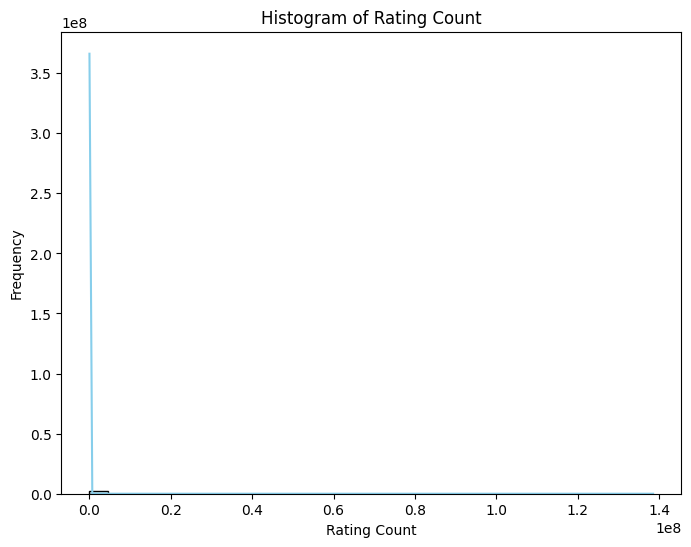

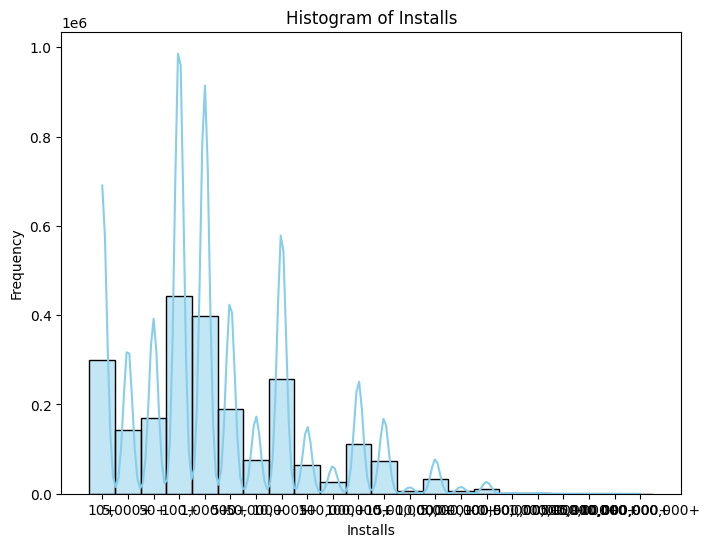

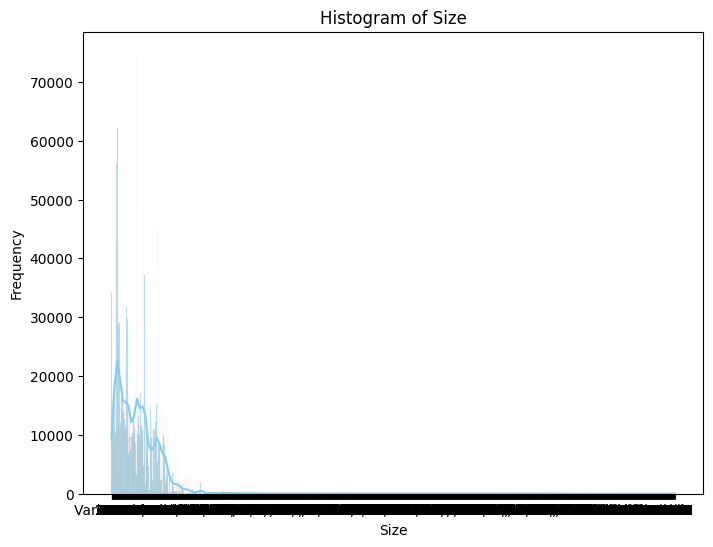

In [11]:
# Choose features for histograms
features_for_histogram = [
    'Rating',
    'Rating Count',
    'Installs',
    'Size',
    # Add more features as needed
]

# Create histograms
for feature in features_for_histogram:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [10]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Identify columns with missing or infinite values
columns_with_missing_values = numeric_columns.columns[numeric_columns.isnull().any() | np.isinf(numeric_columns).any()]

# Print columns with missing or infinite values
print("Columns with missing or infinite values:", columns_with_missing_values)

# Drop rows with missing or infinite values in any of the selected columns
df_cleaned = df.dropna(subset=columns_with_missing_values)
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()

# Select only numeric columns from the cleaned DataFrame
numeric_columns_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Correlation Analysis
correlation_matrix = numeric_columns_cleaned.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Regression Analysis
X = numeric_columns_cleaned.drop(columns=['Rating'])
X = sm.add_constant(X)  # add a constant term to the independent variables
y = numeric_columns_cleaned['Rating']

model = sm.OLS(y, X).fit()
print("\nRegression Summary:")
print(model.summary())

# Hypothesis Testing
print("\nHypothesis Testing:")
for column in X.columns[1:]:
    print(f"H0: {column} has no significant effect on 'Rating'")
    print(f"H1: {column} has a significant effect on 'Rating'")
    print(f"p-value for {column}: {model.pvalues[column]}")
    print()

Columns with missing or infinite values: Index(['Rating', 'Rating Count', 'Minimum Installs'], dtype='object')

Correlation Matrix:
                    Rating  Rating Count  Minimum Installs  Maximum Installs  \
Rating            1.000000      0.016184          0.013084          0.015020   
Rating Count      0.016184      1.000000          0.536045          0.560042   
Minimum Installs  0.013084      0.536045          1.000000          0.956965   
Maximum Installs  0.015020      0.560042          0.956965          1.000000   
Price            -0.003883     -0.000605         -0.000641         -0.000732   

                     Price  
Rating           -0.003883  
Rating Count     -0.000605  
Minimum Installs -0.000641  
Maximum Installs -0.000732  
Price             1.000000  

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.000
Model:                            